<div class="alert alert-block alert-success">
    <b><center>LOGISTIC CLASSIFICATION</center></b>
    <b><center>Activation Function & Sigmoid Function에 댸한 기본을 이해하기 위한 코드</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [3]:
np.set_printoptions(linewidth=200, precision=2)
tf.__version__

'1.15.0'

# Understanding The Concept

In [4]:
targets = np.array([
    [1, 7, 0],
    [2, 8, 0],
    [3, 9, 0],
    [4, 10, 1],
    [5, 11, 1],
    [6, 12, 1]
])

In [5]:
data, label = targets[:,0:-1], targets[:,[-1]]
rsp.showMulti(data, label)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

## Sigmoid With Hypothesis
$$ \sigma (z)=\frac { 1 }{ 1+{ e }^{ -z } } $$
$$ \sigma (H(X))=\frac { 1 }{ 1+{ e }^{ -(WX+b) } }  $$

In [6]:
eduConf = rsp.EduPlotConf(font="NanumGothicCoding", figScale=1)
plotSigmoid = rsp.EduPlot2D(eduConf)

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

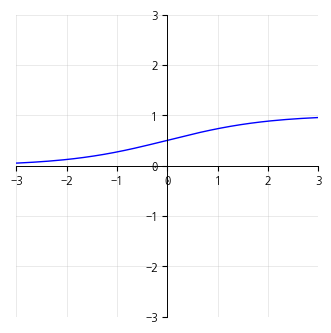

In [8]:
x = np.linspace(-10, 10, 200)
plotSigmoid.addXYData(x, sigmoid(x), name="sigmoid")
plotSigmoid.genSpace(3)
plt.show()
plt.close()

In [9]:
plotNeuron = rsp.EduPlot2D(eduConf)

In [10]:
@interact(w=(-50, 50), b=(-50, 50))
def neuron(w, b):
    plotNeuron.addXYData(x, sigmoid(w*x+b), name="neuron")
    plotNeuron.genSpace(4)
    plt.show()
    plt.close()

interactive(children=(IntSlider(value=0, description='w', max=50, min=-50), IntSlider(value=0, description='b'…

## Cost Function

$$ cost(W,b)=\frac { 1 }{ m } \sum _{ i=1 }^{ m }{ { (\sigma (W{ x }_{ i }^{ (l) }+b)-{ y }_{ i }^{ (l) }) }^{ 2 } } $$

In [11]:
def cost(data, label, w, b=1):
    return np.average(np.square(sigmoid(w * data + b) - label))

In [12]:
plotNeuronCost = rsp.EduPlot2D(eduConf)

In [13]:
y = np.linspace(-10, 10, 50)
x = np.random.random([50,2])

In [14]:
@interact(b=(-30.0, 30.0, 0.001), zoom=(0, 20))
def costMSE(b, zoom):
    Ws = np.linspace(-10, 10, 200)
    loss = [cost(data, label, w, b=b)*zoom for w in Ws]
    plotNeuronCost.addXYData(Ws, loss, name="cost")
    plotNeuronCost.genSpace(10)
    plt.show()
    plt.close()

interactive(children=(FloatSlider(value=0.0, description='b', max=30.0, min=-30.0, step=0.001), IntSlider(valu…

## New Cost Function
$$ cost()\quad =\quad \frac { 1 }{ m } \sum { c(H(x),y) } $$
$$ c(H(x),y)=\begin{cases} -log(H(x))\quad :\quad y=1 \\ -log(1-H(x))\quad :\quad y=0 \end{cases} $$
$$cost(W, b)=-\frac { 1 }{ m } \sum { ylog } (H(x)) + (1-y)(log(1-H(x))$$

In [15]:
def log1(x):
    np.log()
    return -np.log(x)

In [16]:
plotLog = rsp.EduPlot2D(eduConf)

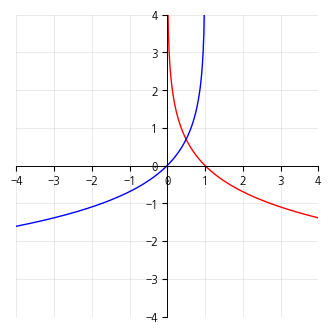

In [17]:
x = np.linspace(-20000, 20000, 2000000)
plotLog.addXYData(x, -np.log(x), color="#FF0000", name="log_1")
plotLog.addXYData(x, -np.log(1 - x), color="#0000FF", name="log_0")
plotLog.genSpace(4)
plt.show()
plt.close()

## Optimize
$$ \underset { W }{ minimize } \quad cost(W,b) = W -\alpha \frac { \partial  }{ \partial W } cost(W) $$

# Logistic Classification

## Generate Model

In [18]:
X = tf.placeholder(tf.float32, shape=[None,2], name="data")
Y = tf.placeholder(tf.float32, shape=[None,1], name="label")
W = tf.Variable(tf.random_normal([2, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

In [19]:
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
loss = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0002).minimize(loss)

## Training

In [20]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [21]:
for step in range(40001):
    loss_val, hy_val, _ = sess.run([loss, hypothesis, optimizer], feed_dict= {X:data, Y:label})
    if step % 10000 == 0:
        rsp.showMulti(loss_val, hy_val)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

## Predict

In [22]:
predict = sess.run([hypothesis], feed_dict={X:data, Y:label})

In [23]:
np.where(np.array(predict) < 0.5, 0, 1)

array([[[0],
        [0],
        [0],
        [1],
        [1],
        [1]]])